# Time Series Analysis of Stock Price Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_excel("Stocks.xlsx")

### Inspect the data

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,36.37,36.42,35.825,36.25,13858795.0,SPGI
1,2013-02-11,36.13,36.18,35.750,35.85,6031957.0,SPGI
2,2013-02-12,35.77,35.90,35.200,35.42,7473991.0,SPGI
3,2013-02-13,35.42,35.57,35.150,35.27,4860053.0,SPGI
4,2013-02-14,35.05,36.73,35.010,36.57,7570052.0,SPGI


In [4]:
df.shape

(5438, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5178 non-null   datetime64[ns]
 1   open    5178 non-null   float64       
 2   high    5178 non-null   float64       
 3   low     5178 non-null   float64       
 4   close   5178 non-null   float64       
 5   volume  5178 non-null   float64       
 6   Name    5438 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 297.5+ KB


### Handle Missing Data

In [6]:
df.isnull().sum()

date      260
open      260
high      260
low       260
close     260
volume    260
Name        0
dtype: int64

In [7]:
df.isnull().mean()*100

date      4.78117
open      4.78117
high      4.78117
low       4.78117
close     4.78117
volume    4.78117
Name      0.00000
dtype: float64

In [8]:
df = df.dropna().reset_index()

In [9]:
df.shape

(5178, 8)

In [10]:
df.isnull().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
df.head()

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,36.37,36.42,35.825,36.25,13858795.0,SPGI
1,1,2013-02-11,36.13,36.18,35.750,35.85,6031957.0,SPGI
2,2,2013-02-12,35.77,35.90,35.200,35.42,7473991.0,SPGI
3,3,2013-02-13,35.42,35.57,35.150,35.27,4860053.0,SPGI
4,4,2013-02-14,35.05,36.73,35.010,36.57,7570052.0,SPGI


### Data Transformation

In [22]:
df.sort_values(by='date', inplace=True)

In [23]:
df.head()

,index,date,open,high,low,close,volume,Name
0,0,2013-02-08,36.37,36.42,35.825,36.25,13858795.0,SPGI
1,2410,2013-02-08,13.96,14.16,13.900,14.16,1716539.0,SPGI
2,3519,2013-02-08,39.91,40.35,39.690,39.88,5288271.0,SPGI
3,1259,2013-02-08,30.67,30.75,30.510,30.65,3169594.0,SPGI
4,1,2013-02-11,36.13,36.18,35.750,35.85,6031957.0,SPGI


In [24]:
del df['index']

In [19]:
df = df.reset_index()

In [25]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,36.37,36.420,35.825,36.25,13858795.0,SPGI
1,2013-02-08,13.96,14.160,13.900,14.16,1716539.0,SPGI
2,2013-02-08,39.91,40.350,39.690,39.88,5288271.0,SPGI
3,2013-02-08,30.67,30.750,30.510,30.65,3169594.0,SPGI
4,2013-02-11,36.13,36.180,35.750,35.85,6031957.0,SPGI
...,...,...,...,...,...,...,...
5173,2018-02-07,53.44,54.350,53.300,53.82,4511483.0,SPGI
5174,2018-02-07,111.52,116.850,111.380,113.62,10030837.0,SPGI
5175,2018-02-07,37.91,39.715,37.610,38.57,2765421.0,SPGI
5176,2018-02-07,75.67,77.570,75.670,76.63,1854947.0,SPGI


In [27]:
df.duplicated().sum()

400

In [28]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(4778, 7)

In [32]:
df.duplicated().sum()

0

In [33]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
Name              object
dtype: object

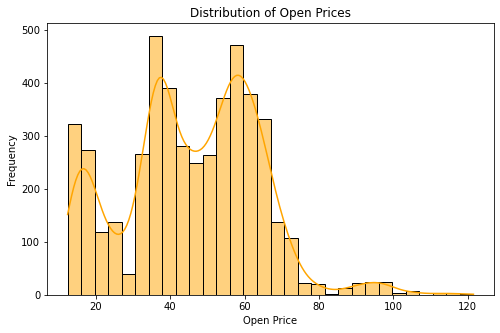

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df['open'], kde=True, bins=30, color='orange')
plt.title("Distribution of Open Prices")
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.show()

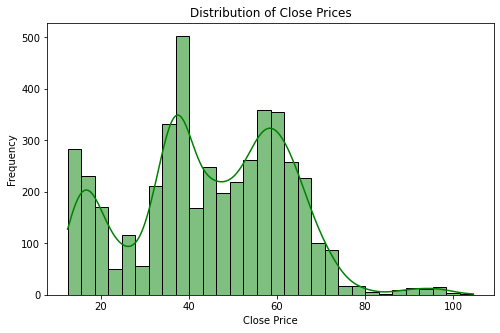

In [96]:
plt.figure(figsize=(8, 5))
sns.histplot(df['close'], kde=True, bins=30, color='green')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

In [40]:
df['open'].describe()

count    4778.000000
mean       45.770888
std        18.087493
min        12.430000
25%        34.575000
50%        46.140000
75%        59.027500
max       121.500000
Name: open, dtype: float64

In [43]:
df['Daily Range'] = df['high'] - df['low']

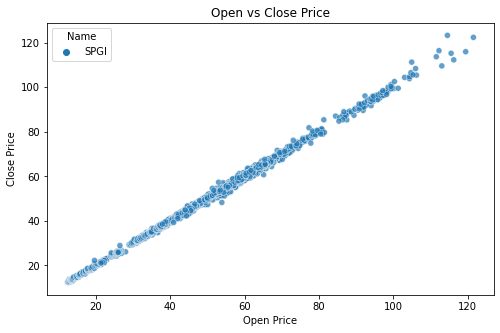

In [42]:
# Step 6: Visualize Data Relationships
# Bivariate analysis: Open vs Close price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['open'], y=df['close'], hue=df['Name'], alpha=0.7)
plt.title("Open vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()


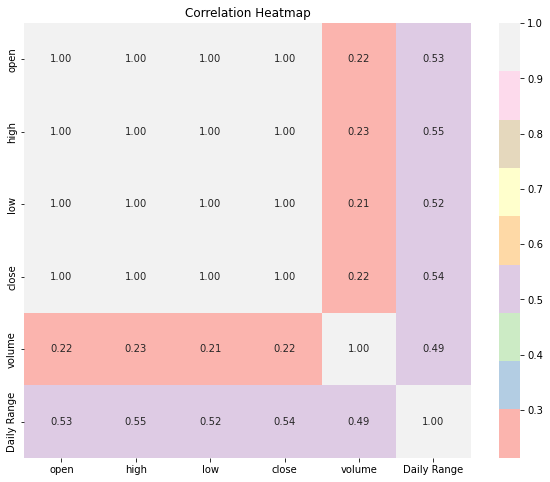

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume', 'Daily Range']].corr(), 
            annot=True, cmap='Pastel1', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

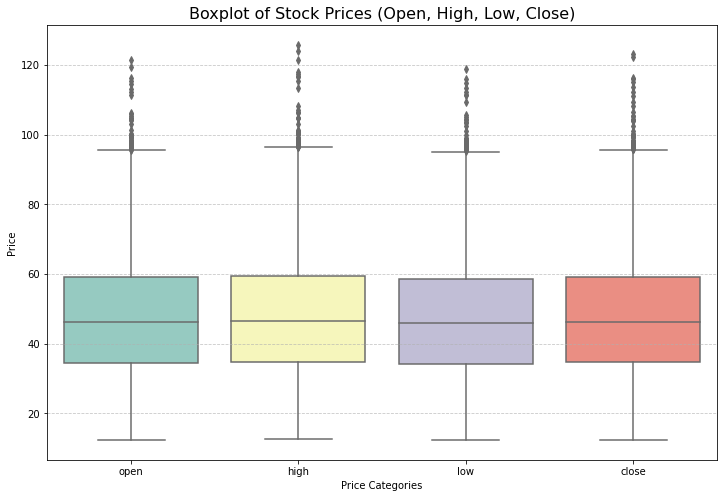

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['open', 'high', 'low', 'close']], palette='Set3')
plt.title("Boxplot of Stock Prices (Open, High, Low, Close)", fontsize=16)
plt.ylabel("Price")
plt.xlabel("Price Categories")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

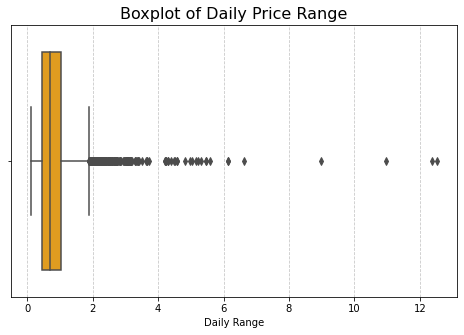

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Daily Range'], color='orange')
plt.title("Boxplot of Daily Price Range", fontsize=16)
plt.xlabel("Daily Range")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Normalized Volume'] = scaler.fit_transform(df[['volume']])

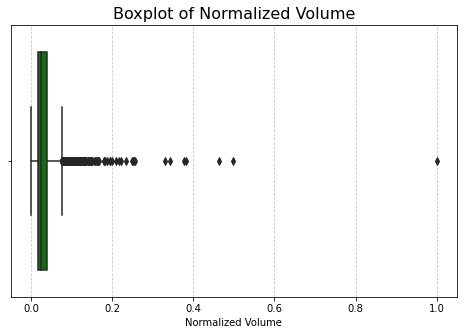

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Normalized Volume'], color='green')
plt.title("Boxplot of Normalized Volume", fontsize=16)
plt.xlabel("Normalized Volume")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [57]:
Q1 = df['Daily Range'].quantile(0.25)
Q3 = df['Daily Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [59]:
outliers = df[(df['Daily Range'] < lower_bound) | (df['Daily Range'] > upper_bound)]

In [60]:
df = df[(df['Daily Range'] >= lower_bound) & (df['Daily Range'] <= upper_bound)]

In [62]:
df.shape

(4536, 9)

### Stock Closing Price Over Time

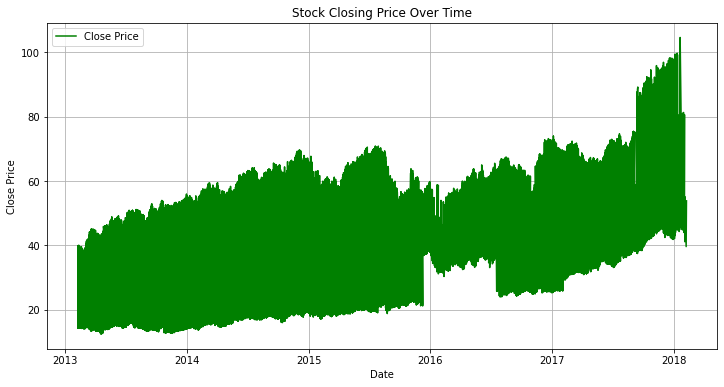

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date']), df['close'], label='Close Price', color='green')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

In [68]:
start_date = "2018-01-01"
end_date = "2018-12-31"
stock_data = df[(pd.to_datetime(df['date']) >= start_date) & 
                           (pd.to_datetime(df['date']) <= end_date)]

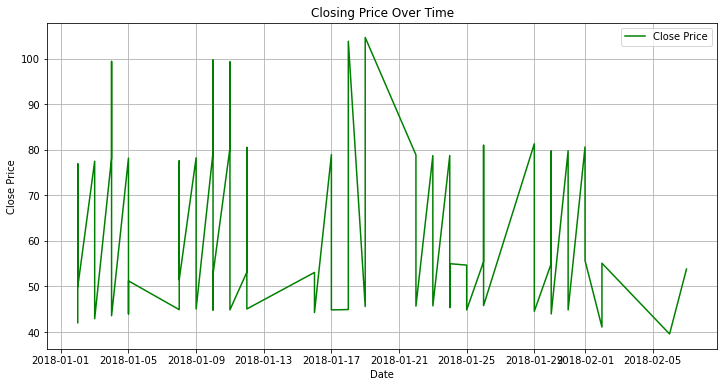

In [70]:
# Line plot for closing prices
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['close'], label='Close Price', color='green')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

High-Low Price Spread

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\507023064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High-Low Spread'] = df['high'] - df['low']


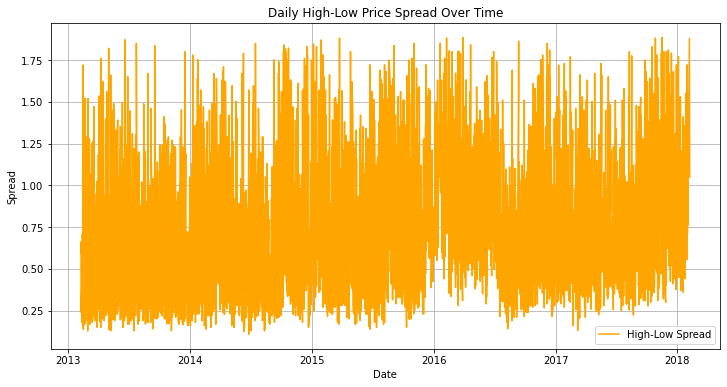

In [66]:
df['High-Low Spread'] = df['high'] - df['low']

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date']), df['High-Low Spread'], label='High-Low Spread', color='orange')
plt.title('Daily High-Low Price Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\3005299809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['High-Low Spread'] = stock_data['high'] - stock_data['low']


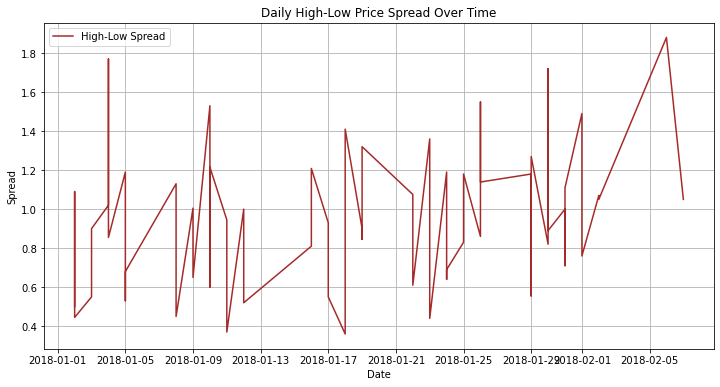

In [79]:
stock_data['High-Low Spread'] = stock_data['high'] - stock_data['low']

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['High-Low Spread'], label='High-Low Spread', color='brown')
plt.title('Daily High-Low Price Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\1532176189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Daily Return (%)'] = stock_data['close'].pct_change() * 100


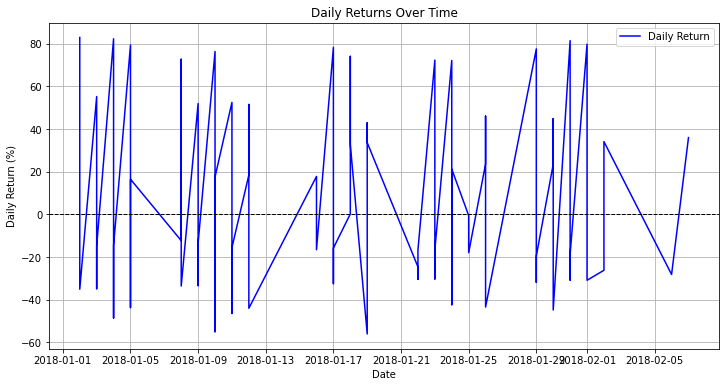

In [72]:
stock_data['Daily Return (%)'] = stock_data['close'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['Daily Return (%)'], label='Daily Return', color='blue')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\1793698498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA_20'] = stock_data['close'].rolling(window=20).mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\1793698498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA_50'] = stock_data['close'].rolling(window=50).mean()


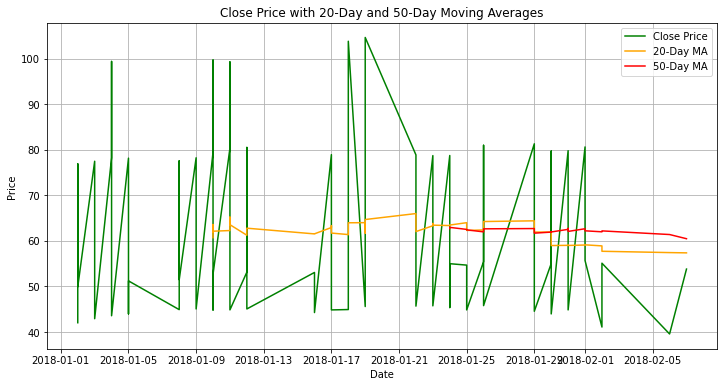

In [73]:
stock_data['MA_20'] = stock_data['close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['close'], label='Close Price', color='green')
plt.plot(pd.to_datetime(stock_data['date']), stock_data['MA_20'], label='20-Day MA', color='orange')
plt.plot(pd.to_datetime(stock_data['date']), stock_data['MA_50'], label='50-Day MA', color='red')
plt.title('Close Price with 20-Day and 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

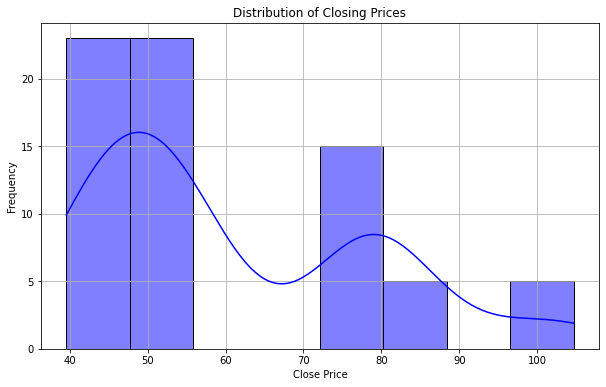

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['close'], kde=True, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\2875999928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Volatility'] = stock_data['close'].rolling(window=20).std()


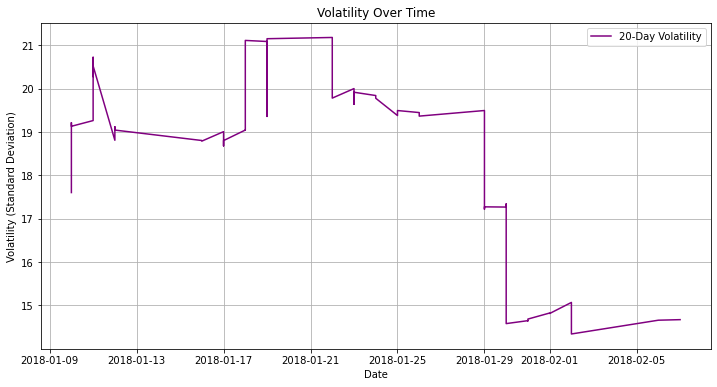

In [75]:
stock_data['Volatility'] = stock_data['close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['Volatility'], label='20-Day Volatility', color='purple')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\1975936603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = pd.to_datetime(df['date']).dt.to_period('M')


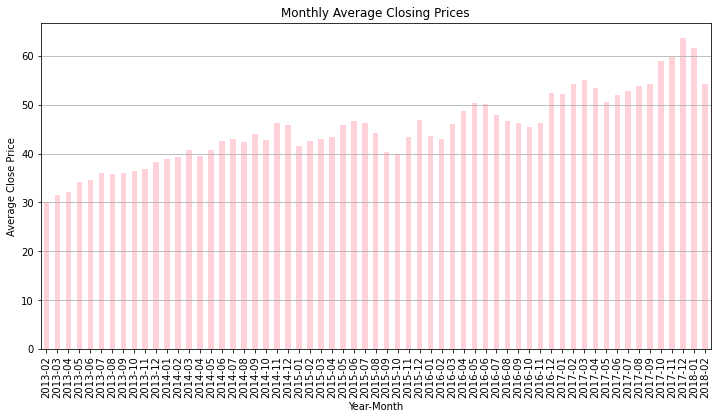

In [99]:
df['Year-Month'] = pd.to_datetime(df['date']).dt.to_period('M')
monthly_avg = df.groupby('Year-Month')['close'].mean()

# Plot monthly average prices
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='pink', alpha=0.7)
plt.title('Monthly Average Closing Prices')
plt.xlabel('Year-Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\3187315215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = pd.to_datetime(df['date']).dt.to_period('Q')


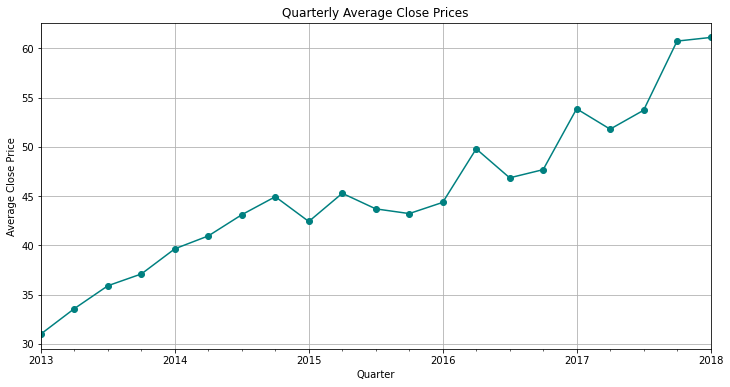

In [86]:
df['Quarter'] = pd.to_datetime(df['date']).dt.to_period('Q')
quarterly_avg = df.groupby('Quarter')['close'].mean()

# Plot quarterly average prices
plt.figure(figsize=(12, 6))
quarterly_avg.plot(kind='line', color='teal', marker='o')
plt.title('Quarterly Average Close Prices')
plt.xlabel('Quarter')
plt.ylabel('Average Close Price')
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\3345811031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Avg Price'] = (stock_data['high'] + stock_data['low']) / 2


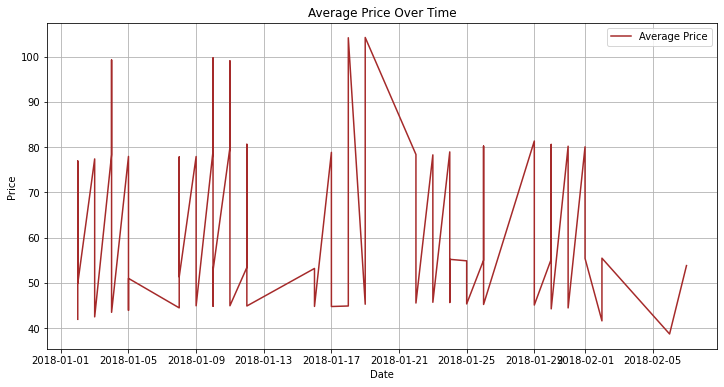

In [84]:
stock_data['Avg Price'] = (stock_data['high'] + stock_data['low']) / 2

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['Avg Price'], label='Average Price', color='brown')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\3354052247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = pd.to_datetime(df['date']).dt.day_name()


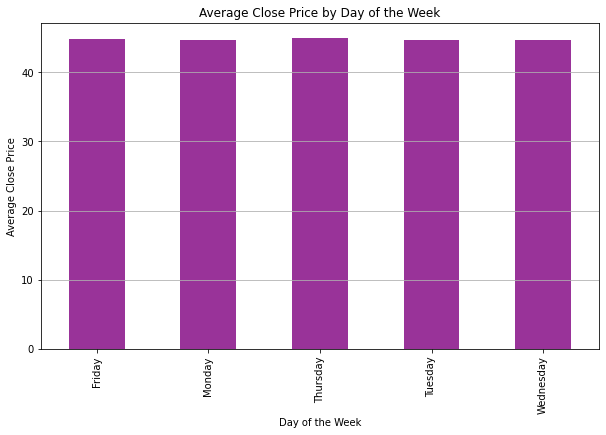

In [88]:
df['Day'] = pd.to_datetime(df['date']).dt.day_name()
avg_day_price = df.groupby('Day')['close'].mean()

# Bar plot of average prices by day
plt.figure(figsize=(10, 6))
avg_day_price.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Average Close Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Close Price')
plt.grid(axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\1218220095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['date']).dt.year


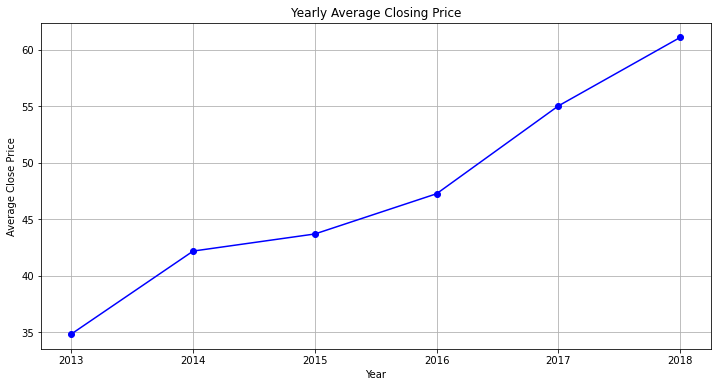

In [89]:
df['Year'] = pd.to_datetime(df['date']).dt.year
yearly_avg = df.groupby('Year')['close'].mean()

# Line plot for yearly trends
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Average Closing Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.grid()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14456\684838374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week'] = pd.to_datetime(df['date']).dt.isocalendar().week


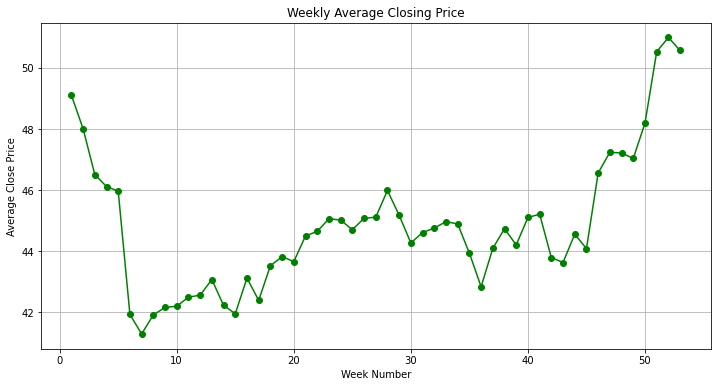

In [90]:
df['Week'] = pd.to_datetime(df['date']).dt.isocalendar().week
weekly_avg = df.groupby('Week')['close'].mean()

plt.figure(figsize=(12, 6))
weekly_avg.plot(kind='line', color='green', marker='o')
plt.title('Weekly Average Closing Price')
plt.xlabel('Week Number')
plt.ylabel('Average Close Price')
plt.grid()
plt.show()

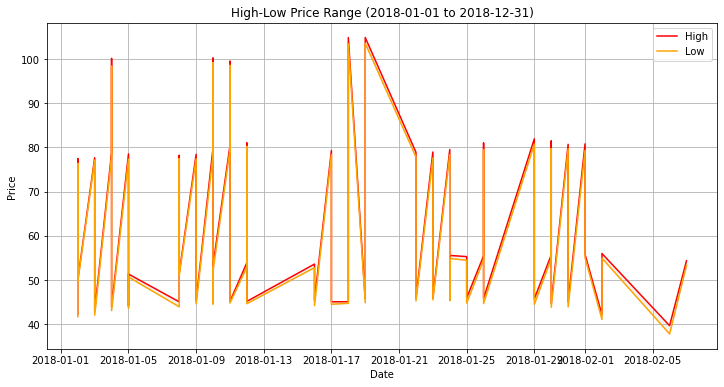

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(stock_data['date']), stock_data['high'], label='High', color='red')
plt.plot(pd.to_datetime(stock_data['date']), stock_data['low'], label='Low', color='orange')
plt.fill_between(pd.to_datetime(stock_data['date']), stock_data['low'], stock_data['high'], color='lightgray', alpha=0.3)
plt.title(f'High-Low Price Range ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
